# Automated Valuation Model

#### Automated Valuation Model (AVM) is a term for a service that uses mathematical modeling combined with databases of existing properties and transactions to calculate real estate values. The majority of automated valuation models (AVMs) compare the values of similar properties at the same point in time. Many appraisers, and even Wall Street institutions, use this type of model to value residential properties. (see [What is an AVM](https://www.investopedia.com/terms/a/automated-valuation-model.asp) Investopedia.com)


#### Why do real estate business use AVMs?
- Real estate companies often use Real Estate AVMs to capture the contact information of potential home-sellers.  Home sellers are valuable leads in the real estate industry and the assumption is that people looking to learn the value of a home might want to sell that home.  Many solution providers sell versions of AVM (the most well-known example is the Zillow Zestimate).  Companies take those AVMs, put them on their website or page and try to identify people in their area who will likely enter the real estate market.


#### Popular Commercial AVM's
* [Zestimate](https://www.zillow.com/zestimate/) - The Zestimate® home valuation model is Zillow’s estimate of a home's market value. The Zestimate incorporates public and user-submitted data, taking into account home facts, location and market conditions.

* [Core Logic](https://www.corelogic.com/landing-pages/automated-valuation-models.aspx) -  CoreLogic® is the chosen AVM provider for 8 of the top 10 U.S. mortgage lenders. 

* [House Canary](https://www.housecanary.com/products/data-points/) - We compute instant valuations spanning property and land values, home equity, and more, and report on the data density behind our conclusions. Gain speed and reduce errors with values and context exactly when and where you need them most.

* [Attom Data](https://www.attomdata.com/data/analytics-derived-data/avm-property-valuations/) - Utilizing more than 80 million homes in our property database across all 50 states and representing 99% of the US population, and valuation software developed by Automated Valuation Model Analytics

### Valuation Process
<img src="valuation_process.png" height="120" >

### Interesting GitHub Repositories related to AVM's
* [Zillow-Kaggle](https://github.com/junjiedong/Zillow-Kaggle/blob/master/README.md) - This repo tackles the first round of Zillow’s Home Value Prediction Competition, which challenges competitors to predict the log error between Zestimate and the actual sale price of houses. And the submissions are evaluated based on Mean Absolute Error between the predicted log error and the actual log error. The competition was hosted from May 2017 to October 2017 on Kaggle, and the final private leaderboard was revealed after the evaluation period ended in January 2018.

* [AutomatedValuationModel](https://github.com/jayshah5696/AutomaticValuationModel/blob/master/notebooks/Final_notebook.ipynb) -  Automated valuation model (AVM) is the name given to a service that can provide real estate property valuations using mathematical modelling combined with a database. Most AVMs calculate a property’s value at a specific point in time by analyzing values of comparable properties. Some also take into account previous surveyor valuations, historica…

* [Lots more on Kaggle](https://www.kaggle.com/c/zillow-prize-1/notebooks) - The Zillow Prize contest competition, sponsored by Zillow, Inc. (“Sponsor”) is open to all individuals over the age of 18 at the time of entry. The competition will contain two rounds, one public and one private.. Each round will have separate datasets, submission deadlines and instructions on how to participate. The instructions on how to participate in each round are listed below. Capitalized terms used but not defined herein have the meanings assigned to them in the Zillow Prize competition Official Rules.

### Other interesting articles
* [towardsdatascience.com](https://towardsdatascience.com/automated-valuation-model-how-it-works-in-real-estate-industry-8d082757e1ed) - Automated Valuation Model — How It Works in Real Estate Industry?

### How does it relate to BCI Risk Modeling?
<img src="bci_flowchart_2.png" height="120" >

### Interesting cross-over companies using AVM technology in the context of climate risk modeling
* [Jupiter Intelligence](https://jupiterintel.com) - Predicting Risk in a Changing Climate: Jupiter’s AI and Scientific Models Deliver Unrivaled Power

### Development Plan
- EDA on golden dataset (due by July 1st) - volunteers? email mike.casale@blockchainclimate.org
- Basic machine learning studies of different models (due by July 8th) - volunteers? email mike.casale@blockchainclimate.org
- Hypertuning & final analysis of machine learning studies (due by July 8th) - volunteers? email mike.casale@blockchainclimate.org
- Completed AVM modeling and pipeline + integrate with AWS microservice (due by Aug 1st) - volunteers? email mike.casale@blockchainclimate.org

# AutoML in EvalML

In [3]:
import evalml, glob, os
from evalml.preprocessing import load_data
import pandas as pd
import urllib
import requests, json
import numpy as np
import pandas as pd

# Use only 2019 + 2020 price data

In [7]:
path = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2020.csv'
price_data2020 = pd.read_csv(path, header=None)
new_col = ['col0','col1', 'col2', 'POSTCODE','col4', 'col5', 'col6','col7','col8','col9','col10','col11','col12','col13','col14','col15']
price_data2020 = price_data2020.rename(columns=dict(zip(price_data2020.columns, new_col)))
add = ['col7', 'col8', 'col9', 'col10'] #,'col11','col12']
price_data2020["FULLADDRESS"] = price_data2020[add].apply(lambda x: ''.join(x.dropna()), axis=1)

path = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2019.csv'
price_data2019 = pd.read_csv(path, header=None)
new_col = ['col0','col1', 'col2', 'POSTCODE','col4', 'col5', 'col6','col7','col8','col9','col10','col11','col12','col13','col14','col15']
price_data2019 = price_data2019.rename(columns=dict(zip(price_data2019.columns, new_col)))
add = ['col7', 'col8', 'col9', 'col10'] #,'col11','col12']
price_data2019["FULLADDRESS"] = price_data2019[add].apply(lambda x: ''.join(x.dropna()), axis=1)

price_data = pd.concat([price_data2019, price_data2020], ignore_index=True, axis=0)
price_data

,col0,col1,col2,POSTCODE,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,FULLADDRESS
0,{965B6D92-5006-95E4-E053-6C04A8C07729},495000,2019-09-30 00:00,TW4 7JN,T,N,F,25,NaN,MANOR AVENUE,NaN,HOUNSLOW,HOUNSLOW,GREATER LONDON,B,A,25MANOR AVENUE
1,{965B6D92-5007-95E4-E053-6C04A8C07729},900000,2019-10-08 00:00,UB8 1NT,D,N,F,253,NaN,PARK ROAD,NaN,UXBRIDGE,HILLINGDON,GREATER LONDON,B,A,253PARK ROAD
2,{965B6D92-5008-95E4-E053-6C04A8C07729},1185000,2019-09-09 00:00,UB10 9LE,O,N,F,53,NaN,SWEETCROFT LANE,NaN,UXBRIDGE,HILLINGDON,GREATER LONDON,B,A,53SWEETCROFT LANE
3,{965B6D92-5009-95E4-E053-6C04A8C07729},560000,2019-10-04 00:00,EN4 0DL,O,N,F,10,NaN,STATION PARADE,NaN,BARNET,ENFIELD,GREATER LONDON,B,A,10STATION PARADE
4,{965B6D92-500A-95E4-E053-6C04A8C07729},180000,2019-10-08 00:00,EN3 7DB,T,N,F,28,NaN,KING EDWARDS ROAD,NaN,ENFIELD,ENFIELD,GREATER LONDON,B,A,28KING EDWARDS ROAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308121,{A96E4ACC-383B-9205-E053-6C04A8C0DA09},660000,2020-03-27 00:00,DA15 7PE,S,N,F,29,NaN,BROOKLANDS AVENUE,NaN,SIDCUP,BEXLEY,GREATER LONDON,A,A,29BROOKLANDS AVENUE
1308122,{A96E4ACC-383C-9205-E053-6C04A8C0DA09},395000,2020-04-01 00:00,ME17 4QU,D,N,F,20,NaN,ADAM CLOSE,COXHEATH,MAIDSTONE,MAIDSTONE,KENT,A,A,20ADAM CLOSECOXHEATH
1308123,{A96E4ACC-383D-9205-E053-6C04A8C0DA09},830000,2020-04-15 00:00,BR1 2AA,D,N,F,"PINES COTTAGE, 22",NaN,PINES ROAD,NaN,BROMLEY,BROMLEY,GREATER LONDON,A,A,"PINES COTTAGE, 22PINES ROAD"
1308124,{A96E4ACC-383E-9205-E053-6C04A8C0DA09},186500,2020-03-24 00:00,ME11 5JU,T,N,F,24,NaN,SWALE AVENUE,NaN,QUEENBOROUGH,SWALE,KENT,A,A,24SWALE AVENUE


# load preprocessed city_of_london.csv file found in location_microservice repo 

In [2]:
path = '../../data/processed/city_of_london.csv'
city_of_london = pd.read_csv(path)
city_of_london

,Unnamed: 0,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,...,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,LAT,LONG,geometry
0,0,4.795790e+32,Flat 4,6 Botolph Alley,NaN,EC3R 8DR,3086455768,C,C,72,...,2.38,NaN,NaN,NO DATA!,"Flat 4, 6 Botolph Alley",City of London,Cities of London and Westminster,51.510177,-0.084334,MULTIPOLYGON (((-0.07202500104904175 51.516029...
1,1,5.275590e+31,Flat 4,5 Foster Lane,NaN,EC2V 6HH,922886568,D,D,57,...,2.50,0.0,N,natural,"Flat 4, 5 Foster Lane",City of London,Cities of London and Westminster,51.515111,-0.096277,MULTIPOLYGON (((-0.07202500104904175 51.516029...
2,2,4.799710e+32,Flat 1,6 Botolph Alley,NaN,EC3R 8DR,8096455768,C,C,78,...,2.60,NaN,NaN,NO DATA!,"Flat 1, 6 Botolph Alley",City of London,Cities of London and Westminster,51.510177,-0.084334,MULTIPOLYGON (((-0.07202500104904175 51.516029...
3,3,5.647660e+32,Flat 6,The Gallery,38 Ludgate Hill,EC4Y 7DE,9852361868,C,C,72,...,3.60,0.0,N,natural,"Flat 6, The Gallery, 38 Ludgate Hill",City of London,Cities of London and Westminster,51.513168,-0.109012,MULTIPOLYGON (((-0.07202500104904175 51.516029...
4,4,4.798840e+32,Flat 3,6 Botolph Alley,NaN,EC3R 8DR,6976455768,C,C,79,...,2.38,NaN,NaN,NO DATA!,"Flat 3, 6 Botolph Alley",City of London,Cities of London and Westminster,51.510177,-0.084334,MULTIPOLYGON (((-0.07202500104904175 51.516029...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,5604,5.736080e+32,Flat 403 Bryer Court,Barbican,NaN,EC2Y 8DE,6026032868,D,D,67,...,2.44,0.0,N,natural,"Flat 403 Bryer Court, Barbican",City of London,Cities of London and Westminster,51.520690,-0.095972,MULTIPOLYGON (((-0.07202500104904175 51.516029...
5605,5605,4.364220e+32,Flat 7 Aldersgate Court,"30, Bartholomew Close",NaN,EC1A 7ES,2934252768,C,C,78,...,2.36,0.0,N,natural,"Flat 7 Aldersgate Court, 30, Bartholomew Close",City of London,Cities of London and Westminster,51.518469,-0.098198,MULTIPOLYGON (((-0.07202500104904175 51.516029...
5606,5606,1.015010e+33,Flat 10,"3, Ludgate Square",NaN,EC4M 7AS,607344178,D,D,63,...,NaN,0.0,NaN,natural,"Flat 10, 3, Ludgate Square",City of London,Cities of London and Westminster,51.513500,-0.101651,MULTIPOLYGON (((-0.07202500104904175 51.516029...
5607,5607,5.153210e+31,Apartment B14,Calico House,42b Bow Lane,EC4M 9DT,4861986568,F,F,33,...,2.62,0.0,N,natural,"Apartment B14, Calico House, 42b Bow Lane",City of London,Cities of London and Westminster,51.513157,-0.093360,MULTIPOLYGON (((-0.07202500104904175 51.516029...


# merge the DF's

In [8]:
city_of_london = city_of_london.drop_duplicates(subset=['POSTCODE'])
price_data = price_data.drop_duplicates(subset=['POSTCODE'])
combined = pd.merge(city_of_london, price_data, on='POSTCODE')
combined

,Unnamed: 0,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,...,col7,col8,col9,col10,col11,col12,col13,col14,col15,FULLADDRESS
0,0,4.795790e+32,Flat 4,6 Botolph Alley,NaN,EC3R 8DR,3086455768,C,C,72,...,"OCTAVE HOUSE, 4",FLAT 3,BOTOLPH ALLEY,NaN,LONDON,CITY OF LONDON,GREATER LONDON,B,A,"OCTAVE HOUSE, 4FLAT 3BOTOLPH ALLEY"
1,6,3.247870e+31,Flat 7,13-17 Long Lane,NaN,EC1A 9PN,9169622568,C,C,75,...,17,FLAT 4,LONG LANE,NaN,LONDON,CITY OF LONDON,GREATER LONDON,B,A,17FLAT 4LONG LANE
2,7,1.186030e+33,Apartment 29 Roman House,Wood Street,NaN,EC2Y 5AG,2544846278,B,B,84,...,ROMAN HOUSE,APARTMENT 50,WOOD STREET,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,ROMAN HOUSEAPARTMENT 50WOOD STREET
3,9,7.672380e+32,Flat 14 Werna House,"31, Monument Street",NaN,EC3R 8BT,6724286968,B,B,84,...,"WERNA HOUSE, 31",FLAT 20,MONUMENT STREET,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,"WERNA HOUSE, 31FLAT 20MONUMENT STREET"
4,15,9.264230e+32,Flat 10 London House,"172, Aldersgate Street",NaN,EC1A 4HU,1923218078,C,B,79,...,"LONDON HOUSE, 172",FLAT 11,ALDERSGATE STREET,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,"LONDON HOUSE, 172FLAT 11ALDERSGATE STREET"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1427,3.566800e+32,"55, Drakes Avenue",NaN,NaN,LU7 3AF,4154396668,B,B,84,...,99,NaN,DRAKES AVENUE,NaN,LEIGHTON BUZZARD,CENTRAL BEDFORDSHIRE,CENTRAL BEDFORDSHIRE,A,A,99DRAKES AVENUE
93,1476,1.661610e+33,Flat 2311,"5, Moor Lane",NaN,EC2Y 9BA,7801810678,B,B,82,...,5,FLAT 2602,MOOR LANE,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,5FLAT 2602MOOR LANE
94,1641,1.537910e+33,Apartment 2,"2, Cloth Court",NaN,EC1A 7LS,386731578,D,D,66,...,2,APARTMENT 2,CLOTH COURT,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,2APARTMENT 2CLOTH COURT
95,2538,1.058420e+33,Apartment 3,"28, Martin Lane",NaN,EC4R 0DR,3803647178,D,B,58,...,28,APARTMENT 2,MARTIN LANE,NaN,LONDON,CITY OF LONDON,GREATER LONDON,A,A,28APARTMENT 2MARTIN LANE


# available columns

In [5]:
for c in combined.columns:
    print(c)

Unnamed: 0
LMK_KEY
ADDRESS1
ADDRESS2
ADDRESS3
POSTCODE
BUILDING_REFERENCE_NUMBER
CURRENT_ENERGY_RATING
POTENTIAL_ENERGY_RATING
CURRENT_ENERGY_EFFICIENCY
POTENTIAL_ENERGY_EFFICIENCY
PROPERTY_TYPE
BUILT_FORM
INSPECTION_DATE
LOCAL_AUTHORITY
CONSTITUENCY
COUNTY
LODGEMENT_DATE
TRANSACTION_TYPE
ENVIRONMENT_IMPACT_CURRENT
ENVIRONMENT_IMPACT_POTENTIAL
ENERGY_CONSUMPTION_CURRENT
ENERGY_CONSUMPTION_POTENTIAL
CO2_EMISSIONS_CURRENT
CO2_EMISS_CURR_PER_FLOOR_AREA
CO2_EMISSIONS_POTENTIAL
LIGHTING_COST_CURRENT
LIGHTING_COST_POTENTIAL
HEATING_COST_CURRENT
HEATING_COST_POTENTIAL
HOT_WATER_COST_CURRENT
HOT_WATER_COST_POTENTIAL
TOTAL_FLOOR_AREA
ENERGY_TARIFF
MAINS_GAS_FLAG
FLOOR_LEVEL
FLAT_TOP_STOREY
FLAT_STOREY_COUNT
MAIN_HEATING_CONTROLS
MULTI_GLAZE_PROPORTION
GLAZED_TYPE
GLAZED_AREA
EXTENSION_COUNT
NUMBER_HABITABLE_ROOMS
NUMBER_HEATED_ROOMS
LOW_ENERGY_LIGHTING
NUMBER_OPEN_FIREPLACES
HOTWATER_DESCRIPTION
HOT_WATER_ENERGY_EFF
HOT_WATER_ENV_EFF
FLOOR_DESCRIPTION
FLOOR_ENERGY_EFF
FLOOR_ENV_EFF
WINDOWS_DESC

# the relevent traditional "real estate" fields are

In [12]:
avm_columns = ['POSTCODE','TOTAL_FLOOR_AREA','LONG','LAT','FLOOR_LEVEL','FLAT_TOP_STOREY','FLAT_STOREY_COUNT','PROPERTY_TYPE','NUMBER_HABITABLE_ROOMS','NUMBER_HEATED_ROOMS', 'col1']
train = combined[avm_columns].rename({'col1':'PRICE'},axis=1)
train.to_csv('../../data/processed/train.csv')
train

,POSTCODE,TOTAL_FLOOR_AREA,LONG,LAT,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,PROPERTY_TYPE,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,PRICE
0,EC3R 8DR,121.05,-0.084334,51.510177,mid floor,NaN,NaN,Flat,NaN,NaN,575000
1,EC1A 9PN,54.90,-0.098967,51.519788,5th,Y,6.0,Flat,2.0,2.0,765820
2,EC2Y 5AG,38.00,-0.092970,51.518357,mid floor,NaN,NaN,Flat,NaN,NaN,1200000
3,EC3R 8BT,45.00,-0.084754,51.509780,2nd,N,NaN,Flat,2.0,2.0,735000
4,EC1A 4HU,60.00,-0.097239,51.518301,2nd,N,NaN,Flat,3.0,3.0,690000
...,...,...,...,...,...,...,...,...,...,...,...
92,LU7 3AF,67.50,-0.654746,51.927030,NO DATA!,NaN,NaN,House,NaN,NaN,331500
93,EC2Y 9BA,39.00,-0.090181,51.519913,21st or above,N,NaN,Flat,1.0,1.0,1280000
94,EC1A 7LS,42.00,-0.100163,51.519115,top floor,NaN,NaN,Maisonette,NaN,NaN,565000
95,EC4R 0DR,76.00,-0.087556,51.510662,1st,N,NaN,Flat,4.0,4.0,800000


# load data into evalML 

In [40]:
from evalml.preprocessing import load_data

X, y = load_data('../../data/processed/train.csv',index='POSTCODE',target='PRICE')
X = X.drop('Unnamed: 0',axis=1)
X, y

             Number of Features
Categorical                   3
Numeric                       7

Number of training examples: 97
Targets
840000     3.09%
520000     2.06%
800000     2.06%
450000     2.06%
575000     2.06%
           ...  
1420250    1.03%
4050000    1.03%
321500     1.03%
1375000    1.03%
1200000    1.03%
Name: PRICE, Length: 87, dtype: object


/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(          TOTAL_FLOOR_AREA      LONG        LAT    FLOOR_LEVEL  \
 POSTCODE                                                         
 EC3R 8DR            121.05 -0.084334  51.510177      mid floor   
 EC1A 9PN             54.90 -0.098967  51.519788            5th   
 EC2Y 5AG             38.00 -0.092970  51.518357      mid floor   
 EC3R 8BT             45.00 -0.084754  51.509780            2nd   
 EC1A 4HU             60.00 -0.097239  51.518301            2nd   
 ...                    ...       ...        ...            ...   
 LU7 3AF              67.50 -0.654746  51.927030       NO DATA!   
 EC2Y 9BA             39.00 -0.090181  51.519913  21st or above   
 EC1A 7LS             42.00 -0.100163  51.519115      top floor   
 EC4R 0DR             76.00 -0.087556  51.510662            1st   
 EC4A 3EA             28.72 -0.108378  51.514902            2nd   
 
          FLAT_TOP_STOREY  FLAT_STOREY_COUNT PROPERTY_TYPE  \
 POSTCODE                                                    
 EC

In [49]:
dfs = X.reset_index()
dfs = dfs[dfs['POSTCODE']=='EC4A 3EA']
dfs.to_csv('../../data/processed/defaults.csv')
dfs

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,POSTCODE,TOTAL_FLOOR_AREA,LONG,LAT,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,PROPERTY_TYPE,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS
96,EC4A 3EA,28.72,-0.108378,51.514902,2nd,N,4.0,Flat,2.0,2.0


In [17]:
automl = evalml.automl.AutoMLSearch(problem_type='regression')
automl.search(X, y)

Using default limit of max_iterations=5.

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for R2. 
Greater score is better.

Searching up to 5 pipelines. 
Allowed model families: xgboost, catboost, random_forest, extra_trees, linear_model



/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

(1/5) Mean Baseline Regression Pipeline        Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean R2: -1.037
(2/5) Extra Trees Regressor w/ Imputer + On... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean R2: -23.181
(3/5) XGBoost Regressor w/ Imputer + One Ho... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean R2: -37.173
(4/5) CatBoost Regressor w/ Imputer            Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean R2: -1.125
(5/5) Random Forest Regressor w/ Imputer + ... Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean R2: -13.274

Search finished after 00:02            
Best pipeline: Mean Baseline Regression Pipeline
Best pipeline R2: -1.037212


In [5]:
automl.rankings

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,CatBoost Regressor w/ Imputer,-1.031764,-3.071756,0.525278,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,0,Mean Baseline Regression Pipeline,-1.037212,-3.082103,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}
2,1,Extra Trees Regressor w/ Imputer + One Hot Enc...,-16.832984,-50.388476,-1522.906770,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,4,Random Forest Regressor w/ Imputer + One Hot E...,-17.861449,-53.632431,-1622.063431,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,2,XGBoost Regressor w/ Imputer + One Hot Encoder,-42.172275,-126.606902,-3965.926256,False,{'Imputer': {'categorical_impute_strategy': 'm...


In [6]:
automl.describe_pipeline(1)

******************************************************
* Extra Trees Regressor w/ Imputer + One Hot Encoder *
******************************************************

Problem Type: regression
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. One Hot Encoder
	 * top_n : 10
	 * categories : None
	 * drop : None
	 * handle_unknown : ignore
	 * handle_missing : error
3. Extra Trees Regressor
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 0.9 seconds

Cross Validation
----------------
                 R2  ExpVariance     MaxError   MedianAE                MSE         MAE  Root Mean Squared Error # Training # Testing
0           -50.388      -43.504 17082340.197 489791.6

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [9]:
pipeline = automl.get_pipeline(2)
print(pipeline.name)
print(pipeline.parameters)

XGBoost Regressor w/ Imputer + One Hot Encoder
{'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'One Hot Encoder': {'top_n': 10, 'categories': None, 'drop': None, 'handle_unknown': 'ignore', 'handle_missing': 'error'}, 'XGBoost Regressor': {'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}}


/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [29]:
import json
with open("../../data/params.json", "w") as outfile:  
    json.dump(pipeline.parameters, outfile) 

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [10]:
best_pipeline = automl.best_pipeline
print(best_pipeline.name)
print(best_pipeline.parameters)

CatBoost Regressor w/ Imputer
{'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'CatBoost Regressor': {'n_estimators': 10, 'eta': 0.03, 'max_depth': 6, 'bootstrap_type': None, 'silent': False, 'allow_writing_files': False}}


/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
automl.results

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mean Baseline Regression Pipeline',
   'pipeline_class': evalml.pipelines.regression.baseline_regression.MeanBaselineRegressionPipeline,
   'pipeline_summary': 'Baseline Regressor',
   'parameters': {'Baseline Regressor': {'strategy': 'mean'}},
   'score': -1.0372120092823651,
   'high_variance_cv': False,
   'training_time': 0.03772902488708496,
   'cv_data': [{'all_objective_scores': OrderedDict([('R2', -3.08210303719534),
                  ('ExpVariance', 0.0),
                  ('MaxError', 1625292.5625),
                  ('MedianAE', 1125292.5625),
                  ('MSE', 1147625949140.748),
                  ('MAE', 996594.2859848485),
                  ('Root Mean Squared Error', 1071273.0506928419),
                  ('# Training', 64),
                  ('# Testing', 33)]),
     'score': -3.08210303719534,
     'binary_classification_threshold': None},
    {'all_objective_scores': OrderedDict([('R2', -0.019227326312692

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



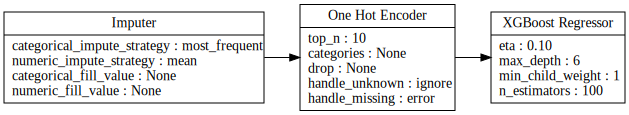

In [19]:
pipeline.graph()

In [33]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, regression=True, test_size=.2)
X_train.to_csv('../../data/processed/X_train.csv')
y_train.to_csv('../../data/processed/y_train.csv')
pipeline.fit(X_train, y_train)
pipeline.score(X_holdout, y_holdout, ["R2", "MAE"])

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



OrderedDict([('R2', -133.4827733122286), ('MAE', 1859852.9015625)])

In [34]:
y_train

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



POSTCODE
EC1Y 0RJ     660000
EC3R 8EE    4050000
EC3R 8BT     735000
EC4A 3BA     990000
EC2M 4NR     615000
             ...   
EC2Y 9BA    1280000
E1 7EF       321500
EC1A 7BB     870000
EC1A 7BT     800000
EC2Y 8AY     780000
Name: PRICE, Length: 77, dtype: int64

In [31]:
pipeline.input_feature_names

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'Imputer': ['TOTAL_FLOOR_AREA',
  'LONG',
  'LAT',
  'FLOOR_LEVEL',
  'FLAT_TOP_STOREY',
  'FLAT_STOREY_COUNT',
  'PROPERTY_TYPE',
  'NUMBER_HABITABLE_ROOMS',
  'NUMBER_HEATED_ROOMS'],
 'One Hot Encoder': ['TOTAL_FLOOR_AREA',
  'LONG',
  'LAT',
  'FLOOR_LEVEL',
  'FLAT_TOP_STOREY',
  'FLAT_STOREY_COUNT',
  'PROPERTY_TYPE',
  'NUMBER_HABITABLE_ROOMS',
  'NUMBER_HEATED_ROOMS'],
 'XGBoost Regressor': ['TOTAL_FLOOR_AREA',
  'LONG',
  'LAT',
  'FLAT_STOREY_COUNT',
  'NUMBER_HABITABLE_ROOMS',
  'NUMBER_HEATED_ROOMS',
  'FLOOR_LEVEL_1st',
  'FLOOR_LEVEL_21st or above',
  'FLOOR_LEVEL_2nd',
  'FLOOR_LEVEL_3rd',
  'FLOOR_LEVEL_4th',
  'FLOOR_LEVEL_5th',
  'FLOOR_LEVEL_6th',
  'FLOOR_LEVEL_Ground',
  'FLOOR_LEVEL_NO DATA!',
  'FLOOR_LEVEL_mid floor',
  'FLAT_TOP_STOREY_N',
  'FLAT_TOP_STOREY_Y',
  'PROPERTY_TYPE_Flat',
  'PROPERTY_TYPE_House',
  'PROPERTY_TYPE_Maisonette']}

In [32]:
with open("../../data/input_feature_names.json", "w") as outfile:  
    json.dump(pipeline.input_feature_names, outfile) 

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



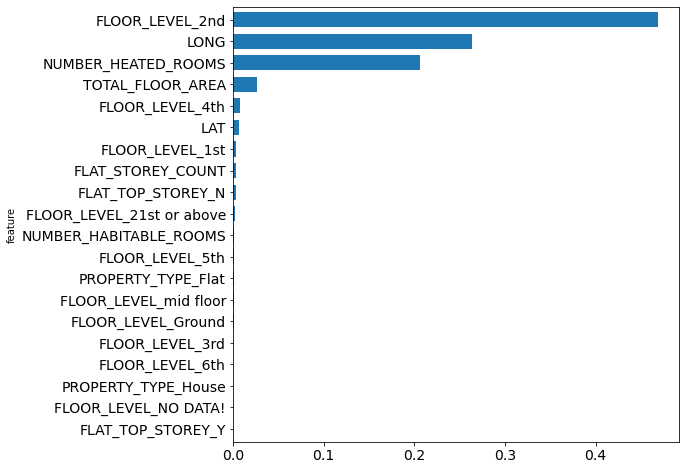

In [21]:
feature_importance = pipeline.feature_importance
feature_importance = feature_importance.set_index('feature')['importance']
top_k = feature_importance.abs().sort_values().tail(20).index
feature_importance[top_k].plot.barh(figsize=(8, 8), fontsize=14, width=.7)

In [28]:
feature_importance

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



feature
FLOOR_LEVEL_2nd              0.468954
LONG                         0.263384
NUMBER_HEATED_ROOMS          0.206724
TOTAL_FLOOR_AREA             0.026609
FLOOR_LEVEL_4th              0.008057
LAT                          0.006683
FLOOR_LEVEL_1st              0.003890
FLAT_STOREY_COUNT            0.003756
FLAT_TOP_STOREY_N            0.003700
FLOOR_LEVEL_21st or above    0.002736
NUMBER_HABITABLE_ROOMS       0.001585
FLOOR_LEVEL_5th              0.000945
PROPERTY_TYPE_Flat           0.000922
FLOOR_LEVEL_mid floor        0.000769
FLOOR_LEVEL_Ground           0.000614
FLOOR_LEVEL_3rd              0.000424
FLOOR_LEVEL_6th              0.000246
Name: importance, dtype: float64

In [38]:
import joblib, pickle
pickle.dump(pipeline.estimator, open("../../data/pipeline.pkl", "wb"))
# joblib.dump(pipeline.estimator, '../../data/pipeline.pkl')

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: ResourceWarning:

unclosed file <_io.BufferedWriter name='../../data/pipeline.pkl'>



In [37]:
pipeline.estimator

/usr/local/anaconda3/envs/microservice_price_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



XGBoostRegressor(eta=0.1, max_depth=6, min_child_weight=1, n_estimators=100)